In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.animation import PillowWriter 
import seaborn as sns

from animation import run_animation
from helper_functions import *
from plots import *

In [2]:
class BacteriaInfection():
    """This represents the bacteria infection """
    def __init__(self, init_state, m, n, bacterium_factor, TIMER_ADAPATIVE_SYSTEM):
        self.init_state = init_state.copy()
        self.TIMER_ADAPATIVE_SYSTEM = TIMER_ADAPATIVE_SYSTEM
        self.bacterium_factor = bacterium_factor
        self.state = init_state.copy()
        self.flag_call_ais = False # flag for the adaptive inmmune system
        self.counter = 0 
        self.m = m # m t-cell will be realeased once adaptive system is activated
        self.n = n # add n macrophage cells wehn t-cell is called
        self.AIS_ts = []
        self.macrophage_encouragement = False
        
    def bacteria(self, t):
        """ Evil cells that drains the body’s resources and after some (random) time divide into multiple copies of itself."""
        self.state.extend(['bacteria']*self.bacterium_factor)

    def macrophage(self, t):
        """Innate immune cells that try to eat bacteria when it encounters them, and start asking for reinforcements if there are many bacteria."""
        self.remove_bacteria()
    
        if self.macrophage_encouragement == True:
            self.remove_bacteria()
            # to do: add a parameter to remove n times bact with a max limit
        
        self.state.append("macrophage")
        
    def dendritic(self, t):
        """Innate immune cells that pick up pieces of (dead) bacteria and use these to activate the adaptive immune system."""
        if "bacteria" in self.state:
            self.state.remove("bacteria")
            # call adaptive inmmune system
            self.flag_call_ais = True 
            self.AIS_ts.append(t)
        else: 
            pass
#             print("There is no more bacteria to eat!")
        
        
    def t_cell(self,t):
        """Adaptive immune cells that can activate specific weapons against a species of bacteria.
        After activation by a dendritic cell they rapidly multiply and start activating B-cells."""
        self.macrophage_encouragement = True
        # b-cell activation 
        self.state.append("b_cell")
        # Add n macrophages to the box
        self.state.extend(['macrophage']*self.n)
        
    def b_cell(self, t):
        """Adaptive immune cells that produce antibodies. These antibodies cover bacteria, 
        making it harder for them to multiply, and easier for macrophages to eat them. B-cells
        need to be activated by helper T-cells and can also multiply rapidly after activation."""
        self.bacterium_factor = 1
        self.macrophage_encouragement = True
        
    def action(self, cell_type, t):
        # bacteria behavior
        actions = {
                    "bacteria": self.bacteria,
                    "macrophage": self.macrophage,
                    "dendritic": self.dendritic,
                    "t_cell" : self.t_cell,
                    "b_cell" : self.b_cell
                   }
        # Get the function from actions dictionary
        func = actions.get(cell_type, "nothing")
        # Execute the function
        func(t)
  
    def antigen_presentation(self):
        # number of turns after ais has been called
        self.counter += 1  
        
        # activate adaptive system
        if (self.counter % self.TIMER_ADAPATIVE_SYSTEM) == 0 :
            self.state.extend(['t_cell']*self.m)
#             print('Adaptive inmmune system has been activated. {} helper t-cell were realeased!'.format(self.m))
            self.flag_call_ais=False
            self.counter = 0
                
    def remove_bacteria(self):
        if "bacteria" in self.state:
            self.state.remove("bacteria")
        else: 
            "There is no more bacteria to eat!"

    def mutate(self, t): 
        """ The infection start spreading 
            generates a new cell and each cell produce an effect in the body """
        # draw a cell uniformly at random (with replacement)
        cell = np.random.choice(self.state, replace=True)
        
        # performa action 
        self.action(cell, t)
        
        # check when to activate adaptive inmmune system
        if self.flag_call_ais == True:             
            self.antigen_presentation() 
    
        return cell 
    
    def simulation(self):
        """ Run the simulation """
        pass

# 1. Understanding the soldiers of your body

In [7]:
# general settings 
fig_dir = './images/'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

## 1.1 Simple example
This is a simple implementation considering that the delay time between the called from the innate system and the adaptive system is inmediate (t=1). This will help us to understand the functions of each cell. 

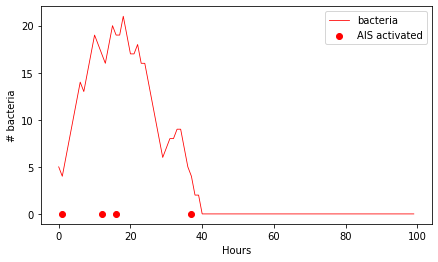

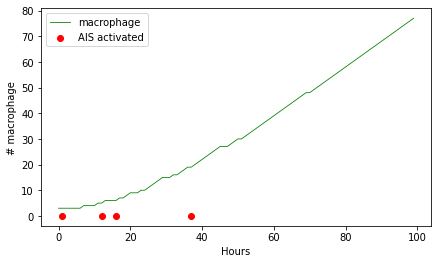

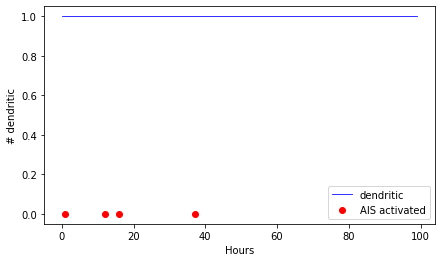

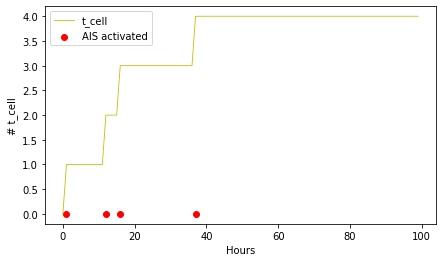

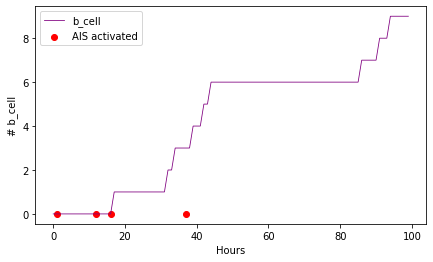

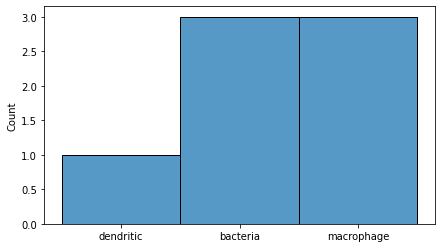

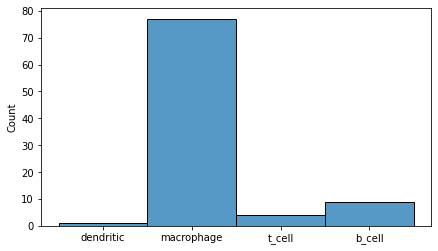

In [27]:
get_ipython().magic('matplotlib inline')

# parameters
delay_ads = 1  # set the number of turns that takes to bring the adaptive inmmune system
m = 1  # m t-cell will be realeased once adaptive system is activated
n_ = 1 # add n macrophage cells wehn t-cell is called
bf = 2 # bacterium factor: number of bacteria multiplicity

# create an instance of the initial state of the system
init_state_bacteria = init_state(lambda_ = 3)

# simulate the process
Ts, states, infection = simulate(init_state_bacteria, BacteriaInfection, m, n_, bf, delay_ads, T=100)
 
name="exp1"
plot_cell(Ts, states, infection, "bacteria", "red", name, fig_dir)
plot_cell(Ts, states, infection, "macrophage", "green", name, fig_dir)
plot_cell(Ts, states, infection, "dendritic", "blue", name, fig_dir)
plot_cell(Ts, states, infection, "t_cell", "y", name, fig_dir)
plot_cell(Ts, states, infection, "b_cell", "purple", name, fig_dir)
plot_state(infection.init_state, name, "init", fig_dir)
plot_state(infection.state, name, "end", fig_dir)

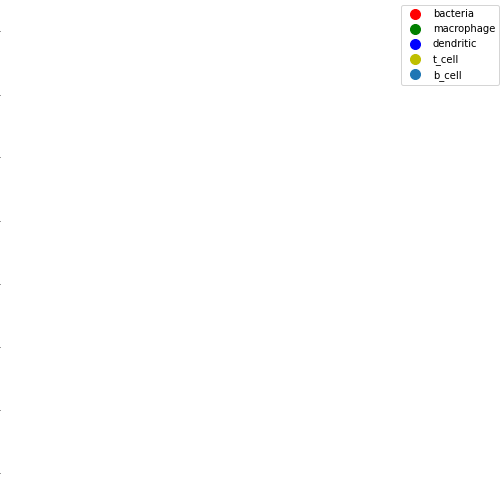

In [6]:
get_ipython().magic('matplotlib widget') 
anim =run_animation(states, infection.AIS_ts, interval=100)  

In [18]:
# save animation
writergif = PillowWriter(fps=100)
anim.save("./animation.gif", dpi=100, writer=writergif)

## 1.2 A more realistic approach 

A more realistic approach involves taking into account the time it takes for the adaptive system to response once it has been called by the innate system. 

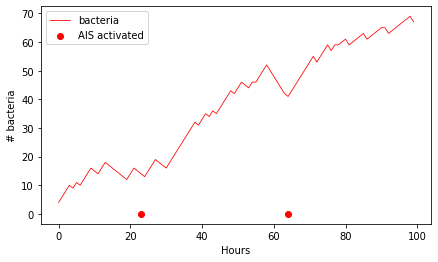

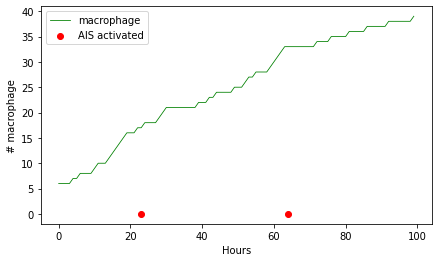

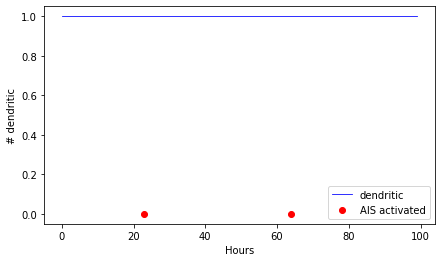

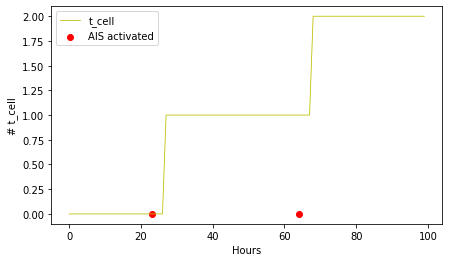

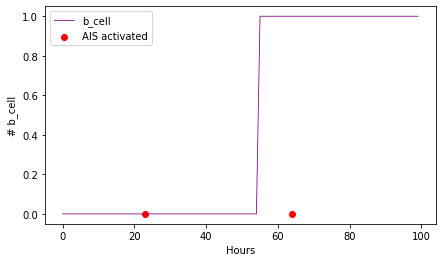

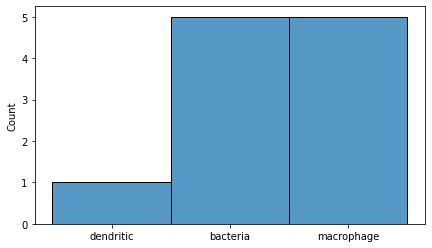

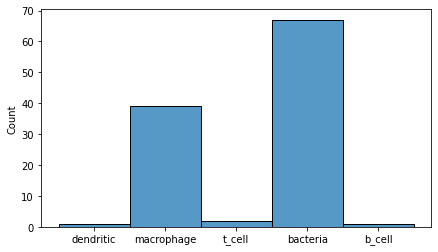

In [34]:
get_ipython().magic('matplotlib inline')

# parameters
delay_ads = 5  # set the number of turns that takes to bring the adaptive inmmune system
m = 1  # m t-cell will be realeased once adaptive system is activated
n_ = 1 # add n macrophage cells when t-cell is called
bf = 2 # bacterium factor: number of bacteria multiplicity

# create an instance of the initial state of the system
init_state_bacteria = init_state(lambda_ = 3)

# simulate the process
Ts, states, infection = simulate(init_state_bacteria, BacteriaInfection, m, n_, bf, delay_ads, T=100)
 
name="exp2"
plot_cell(Ts, states, infection, "bacteria", "red", name, fig_dir)
plot_cell(Ts, states, infection, "macrophage", "green", name, fig_dir)
plot_cell(Ts, states, infection, "dendritic", "blue", name, fig_dir)
plot_cell(Ts, states, infection, "t_cell", "y", name, fig_dir)
plot_cell(Ts, states, infection, "b_cell", "purple", name, fig_dir)
plot_state(infection.init_state, name, "init", fig_dir)
plot_state(infection.state, name, "end", fig_dir)

# Simulate N times

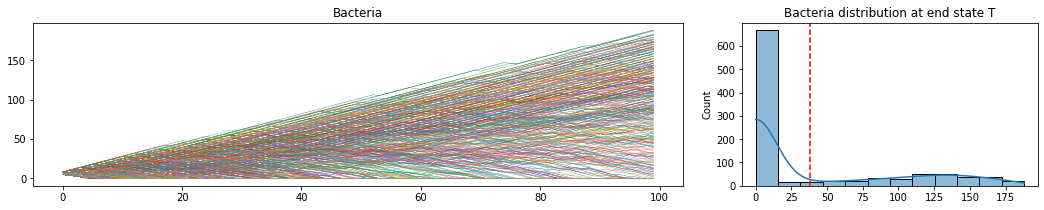

In [10]:
# number of simulations
n = 1000
paths = np.zeros(n)

# plotting
fig, axs = plt.subplots(1, 2, figsize=(2*9, 3), sharey=False)
axs[0] = plt.subplot2grid((1, 3), (0, 0), colspan=2)

# run n simulations
for i in range(n):
    Ts, states, infection = simulate(init_state_bacteria, T=100)
    axs[0].plot(Ts, states["bacteria"], linewidth=0.4)
    paths[i]= states["bacteria"][-1]
axs[0].set_title('Bacteria')

axs[1] = plt.subplot2grid((1, 3), (0, 2))

if n > 2: 
    sns.histplot(paths, kde=True, ax=axs[1])
    plt.axvline(x=paths.mean(), color= 'r', linestyle='--')
    axs[1].set_title('Bacteria distribution at end state T')
plt.show()

# Extra: Images for report

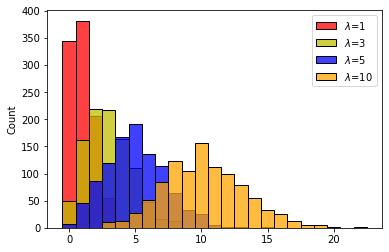

In [112]:
get_ipython().magic('matplotlib inline')

lambdas = [1,3,5,10]
colors = ['r', 'y', 'b', 'orange']

for i, lamba_ in enumerate(lambdas):
    samples = np.random.poisson(lamba_, 1000)
    sns.histplot(samples, discrete=True, color=colors[i], label="$\lambda$={}".format(lamba_))

plt.legend()
plt.savefig(fig_dir + '/poisson.jpg', bbox_inches='tight')

<AxesSubplot:ylabel='Count'>

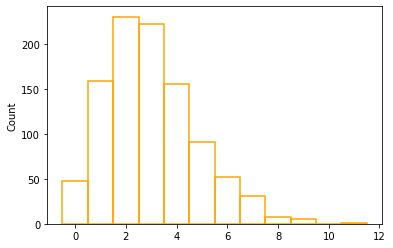

In [109]:
samples = np.random.poisson(3, 1000)
sns.histplot(samples, discrete=True, color=colors[i], label="$\lambda$={}".format(lamba_), fill=False)